<a href="https://colab.research.google.com/github/OkktaDan/CCMACLRL_EXERCISES_COM231/blob/main/Midterm/Octaviano_midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

## Training Data

I only used 1000 sample data for the scatter plots due to time restraints, i dont know how much it affects the final result but trust

In [59]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.drop('id', axis=1)
smple=traindata.head(1000)
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

# Scatter Plots


Checked the relationship of each dependent variable to our independent variable.

From what I understand between all the scatter plots, the possible highest impacts to the independent variable are deforestation, urbanization, political factors, inadequate planning. Due to the upward relationship of it towards flooding possibiity.

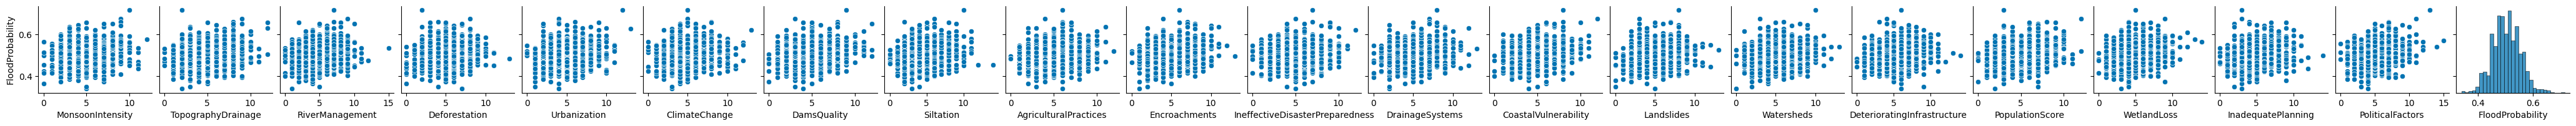

In [ ]:
sns.set_palette('colorblind')
sns.pairplot(data=smple, height=2, y_vars='FloodProbability')

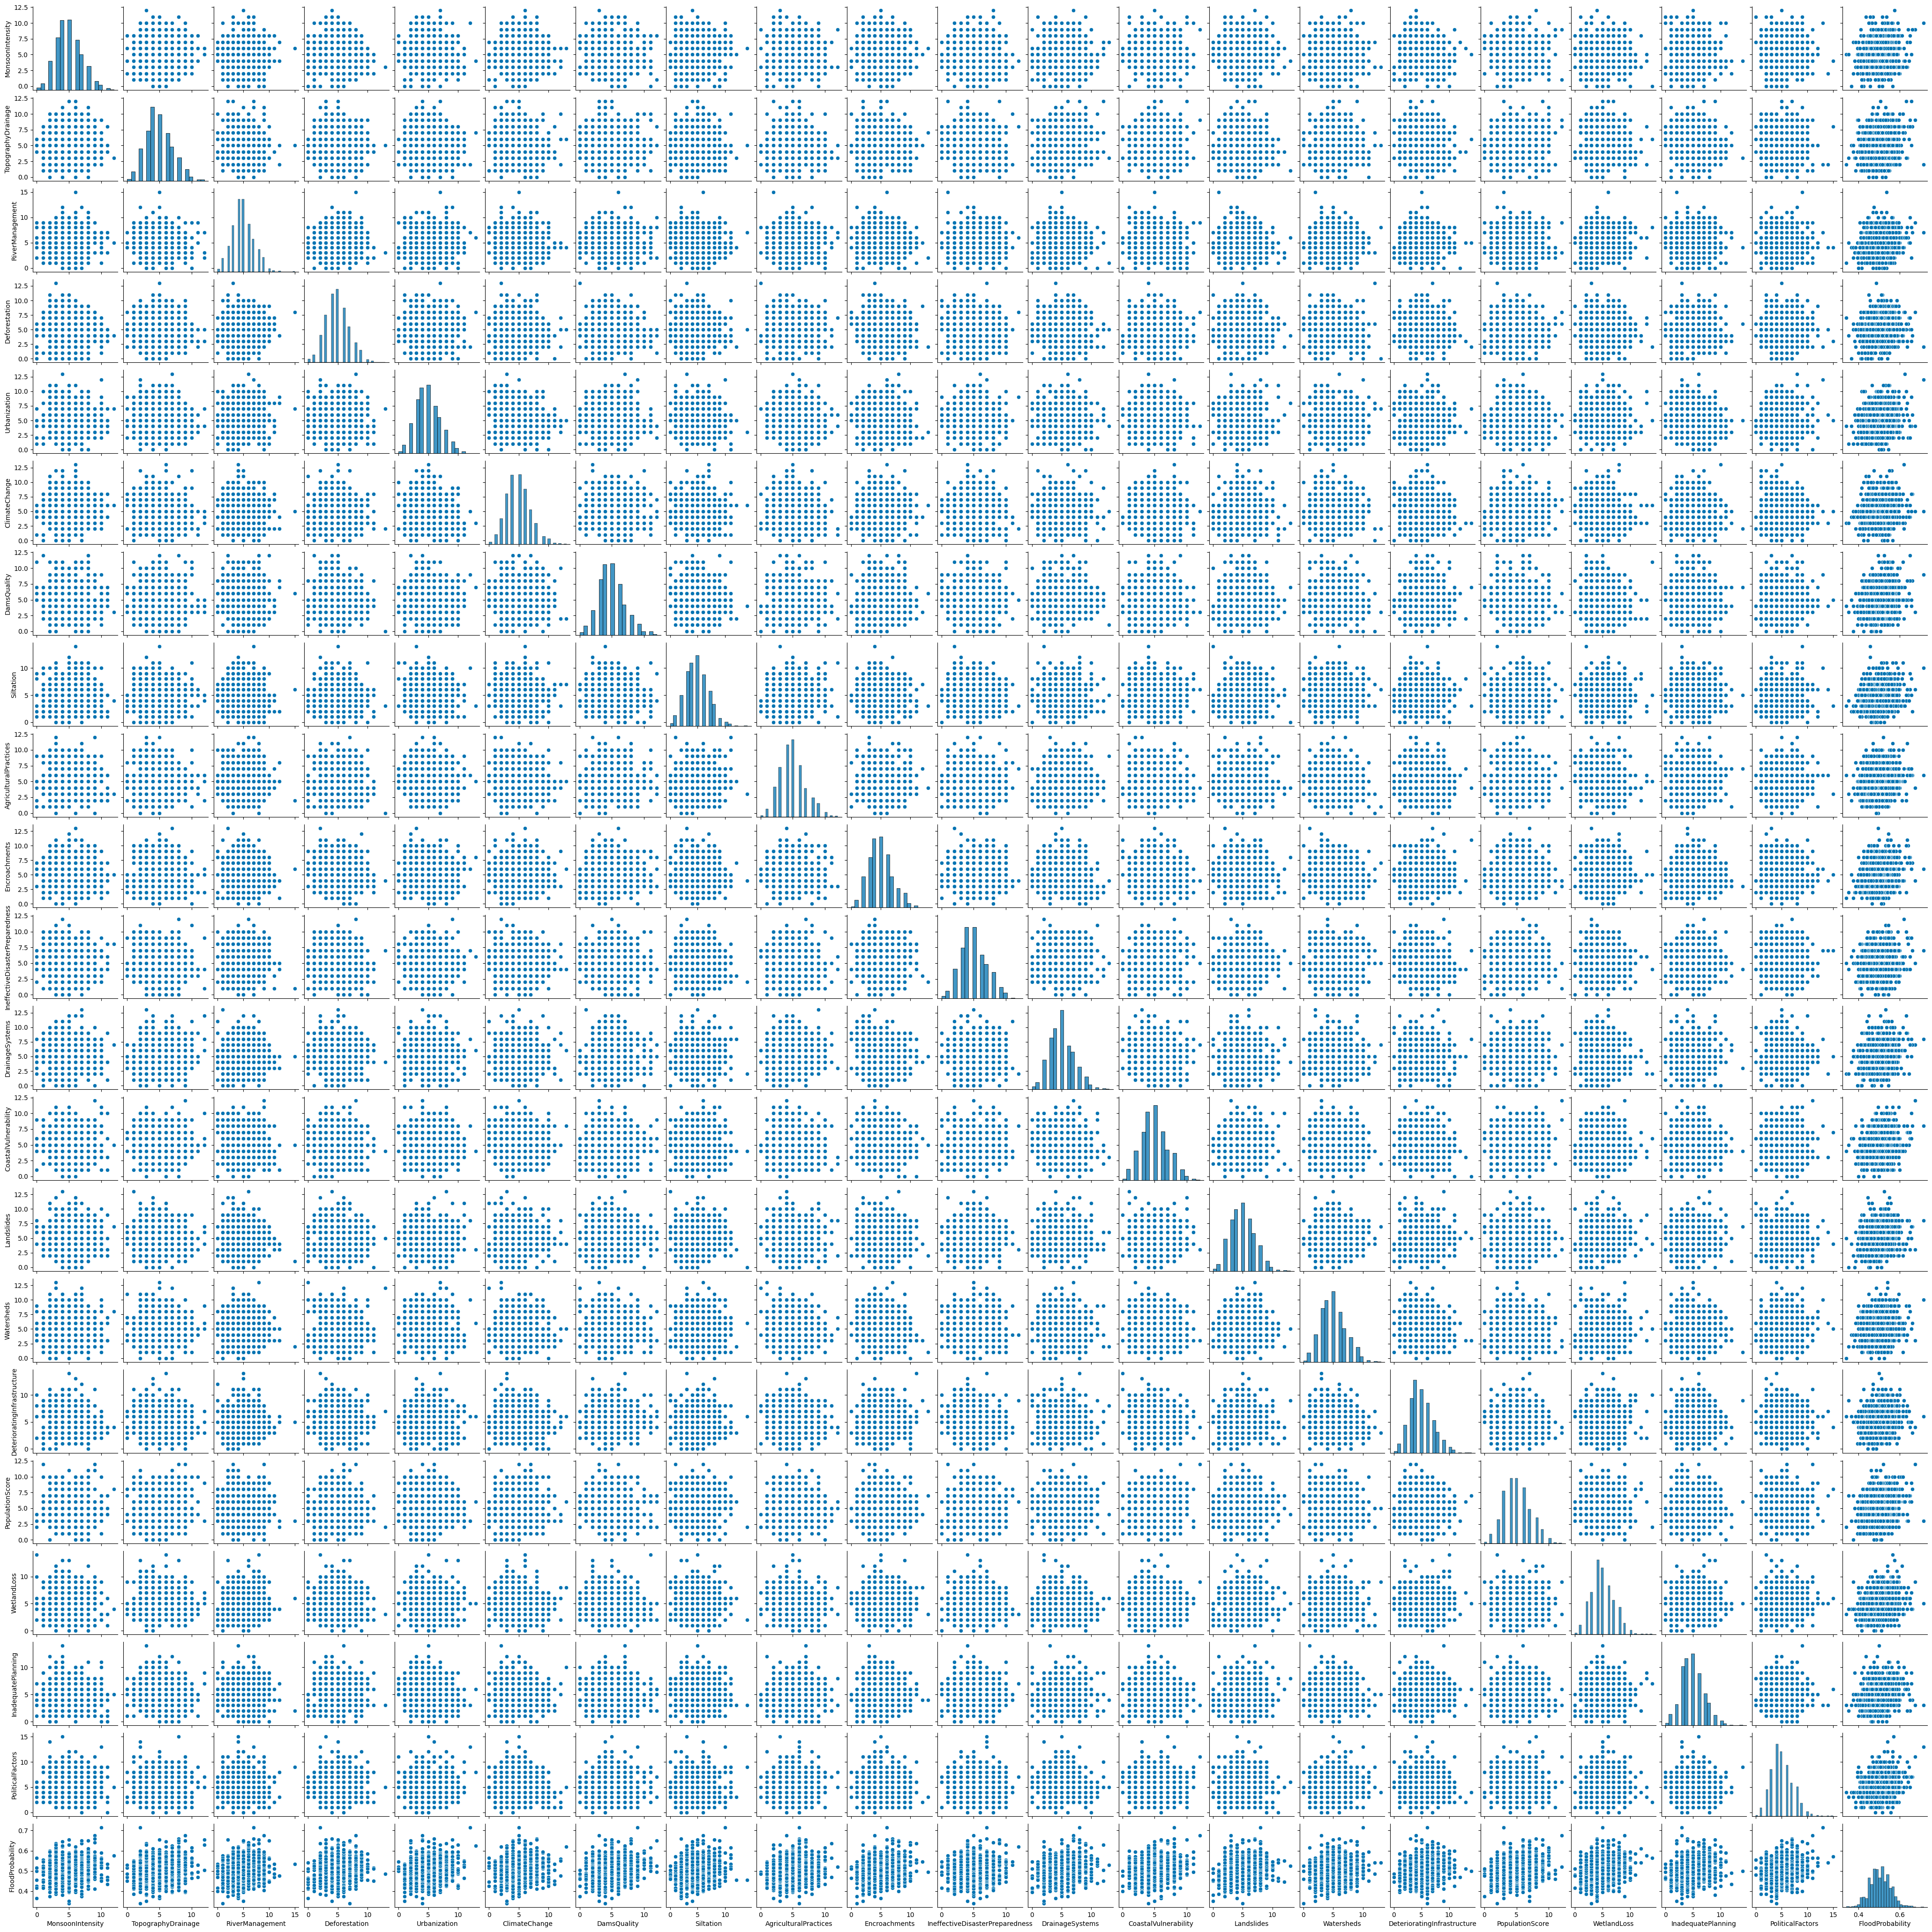

In [ ]:
sns.set_palette('colorblind')
sns.pairplot(data=smple, height=2)

# Correlation HeatMap

In [34]:
correlation = traindata.corr()
correlation

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


The heatmap shows, that no one variable has a major effect with flood probability.

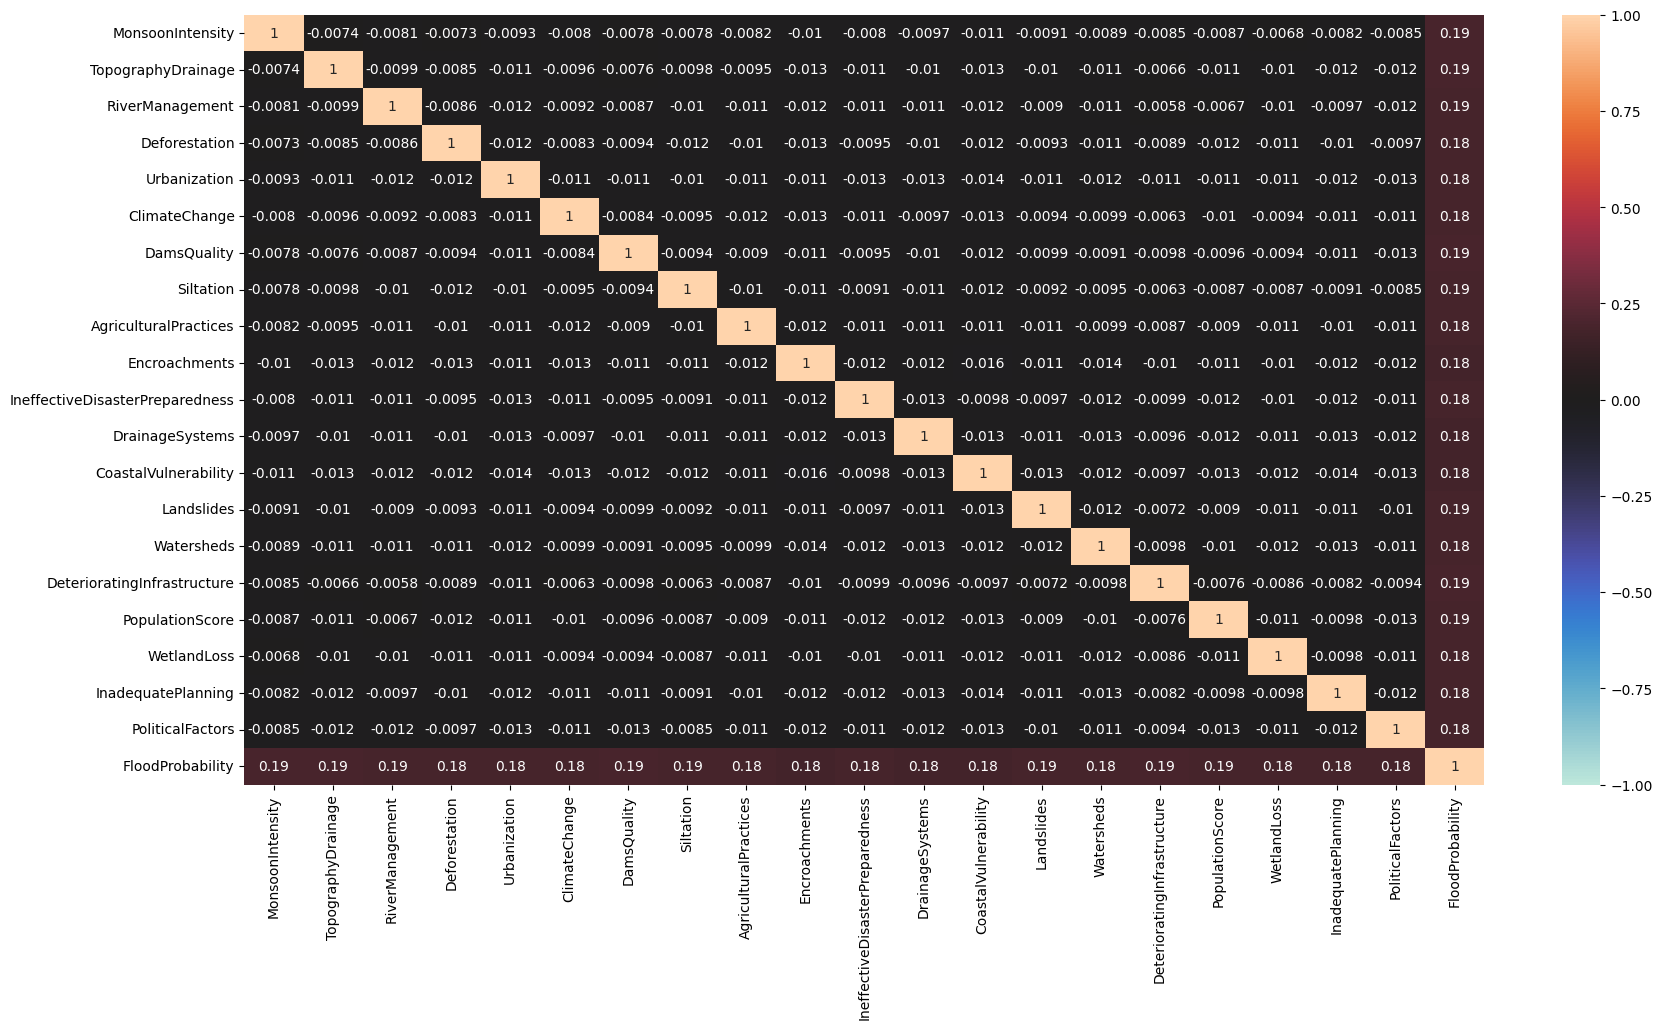

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, annot=True, vmin = -1, vmax=1, center=0)
plt.show()

# Train

This is where i trained all of the given variables to get the base data of the model.

In [57]:
x = traindata[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
        'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
        'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability',
        'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore','WetlandLoss',
        'InadequatePlanning', 'PoliticalFactors']]
x = sm.add_constant(x)
y = traindata['FloodProbability']

model = LinearRegression()
model.fit(x, y)

olsmod = sm.OLS(y, x).fit()
print(olsmod.summary())


                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        05:41:59   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

This is where I based the scatter plot idea into where these variables affect flooding probability the most based on the scatter plots.

In [65]:
x = traindata[['Deforestation', 'Urbanization', 'PoliticalFactors', 'InadequatePlanning']]
x = sm.add_constant(x)
y = traindata['FloodProbability']

model = LinearRegression()
model.fit(x, y)

olsmod = sm.OLS(y, x).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                 4.448e+04
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:14:45   Log-Likelihood:             1.8226e+06
No. Observations:             1117957   AIC:                        -3.645e+06
Df Residuals:                 1117952   BIC:                        -3.645e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4129      0

This is where I tried the heatmap best correlation variables, its r_score is not that better than using all the variables

In [66]:
x = traindata[['MonsoonIntensity', 'RiverManagement', 'Urbanization', 'Deforestation', 'PoliticalFactors']]
x = sm.add_constant(x)
y = traindata['FloodProbability']

model = LinearRegression()
model.fit(x, y)

olsmod = sm.OLS(y, x).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 4.833e+04
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:24:16   Log-Likelihood:             1.8495e+06
No. Observations:             1117957   AIC:                        -3.699e+06
Df Residuals:                 1117951   BIC:                        -3.699e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3874      0.000  

I tried this "anti-politics" model

In [67]:
x = traindata[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
        'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
        'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability',
        'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore','WetlandLoss',
        'InadequatePlanning']]
x = sm.add_constant(x)
y = traindata['FloodProbability']

model = LinearRegression()
model.fit(x, y)

olsmod = sm.OLS(y, x).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 2.234e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:31:05   Log-Likelihood:             2.6166e+06
No. Observations:             1117957   AIC:                        -5.233e+06
Df Residuals:                 1117937   BIC:                        -5.233e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Test File

In [60]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)
testdata = sm.add_constant(testdata)
testdata = testdata.drop('id', axis=1)
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   const                            745305 non-null  float64
 1   MonsoonIntensity                 745305 non-null  int64  
 2   TopographyDrainage               745305 non-null  int64  
 3   RiverManagement                  745305 non-null  int64  
 4   Deforestation                    745305 non-null  int64  
 5   Urbanization                     745305 non-null  int64  
 6   ClimateChange                    745305 non-null  int64  
 7   DamsQuality                      745305 non-null  int64  
 8   Siltation                        745305 non-null  int64  
 9   AgriculturalPractices            745305 non-null  int64  
 10  Encroachments                    745305 non-null  int64  
 11  IneffectiveDisasterPreparedness  745305 non-null  int64  
 12  Dr

In [62]:
y_pred = model.predict(testdata)
y_pred

array([0.57361512, 0.45524331, 0.4547424 , ..., 0.62433022, 0.55092543,
       0.51147209])

## Sample Submission File

In [64]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
y_pred = model.predict(testdata)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


All in all my findings were not much all i could conclude was using all variables was the best choice after constant trial and error.
